In [ ]:
from google.colab import drive
drive.flush_and_unmount() #makes sure we have fresh start
drive.mount('/content/gdrive') #mount just normal directory of google drive
 
 
from scipy import stats #t-tests, etc
import seaborn as sns #graphs
import matplotlib.pyplot as plt #
import numpy as np
import pandas as pd
plt.style.use('seaborn')
 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/gdrive/My Drive/Thinkful/steamgamesales.csv') 

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


**Title**: Steam Game Data <br> 
**Source**: data.world <br> <br>
**Introduction**: Steam is a distrubution platform for pc games. It is one of the top platforms that players use to purchase and play games. It allows users to store games in its library without having to use too much computer memory.  I, myself, am a user of this platform. <br><br>
**Goal**: I will be focusing on game prices, player count, and score/ratings in this project. This analysis will benefit potential developers who want to create a game and submit to Steam and for gamers who want to better understand the player base in relation to price and ratings. <br><br>
**Hypotheses**:
1.	H₀ - There is no correlation between no. players and recommendation count <br>
Hₐ - There is a correlation between no. players and recommendation count 

2.	H₀ - Price does not affect the amount of players <br>
Hₐ  - Price does affect the amount of players

3.	H₀ - There is no correlation between metacritic ratings and no. players?<br>
Hₐ  - There is a correlation between metacritic ratings and no. players




Section 1: Clean up Data File

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   QueryID                  1741 non-null   int64  
 1   QueryName                1741 non-null   object 
 2   ReleaseYear              1741 non-null   int64  
 3   Metacritic               1741 non-null   int64  
 4   RecommendationCount      1741 non-null   int64  
 5   SteamSpyOwners           1741 non-null   int64  
 6   SteamSpyPlayersEstimate  1741 non-null   int64  
 7   PriceCurrency            1741 non-null   object 
 8   PriceFinal               1741 non-null   float64
 9   SupportURL               1741 non-null   object 
 10  AboutText                1741 non-null   object 
 11  Background               1741 non-null   object 
 12  ShortDescrip             1741 non-null   object 
 13  DetailedDescrip          1741 non-null   object 
 14  DRMNotice               

In [ ]:
#Selecting only columns I need/will analyze
df_new = df[['QueryID','QueryName','Metacritic','ReleaseYear','RecommendationCount','SteamSpyPlayersEstimate','PriceFinal']]
df_new.head()

,QueryID,QueryName,Metacritic,ReleaseYear,RecommendationCount,SteamSpyPlayersEstimate,PriceFinal
0,296910,8BitBoy,0,2014,1442,100077,3.99
1,219600,NBA 2K13,90,2012,451,100256,29.99
2,267920,Gun Metal,0,2014,450,100256,0.99
3,289690,Lara Croft and the Temple of Osiris,73,2014,872,100436,19.99
4,341190,Hotline Miami 2: Wrong Number Digital Comic,0,2015,0,100436,0.00


In [ ]:
#rename columns
df_new = df_new.rename({'SteamSpyPlayersEstimate': 'Players', 'PriceFinal': 'Price'}, axis=1) 

In [ ]:
#Change object/ints into categorical variables
df_new["QueryID"] = df_new["QueryID"].astype('category')
df_new["QueryName"] = df_new["QueryName"].astype('category')
df_new["ReleaseYear"] = df_new["ReleaseYear"].astype('category')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   QueryID              1741 non-null   category
 1   QueryName            1741 non-null   category
 2   Metacritic           1741 non-null   int64   
 3   ReleaseYear          1741 non-null   category
 4   RecommendationCount  1741 non-null   int64   
 5   Players              1741 non-null   int64   
 6   Price                1741 non-null   float64 
dtypes: category(3), float64(1), int64(3)
memory usage: 250.6 KB


**Hypothesis 1:** <br>
H₀ - Price does not affect the amount of players<br>
Hₐ - Price does affect the amount of players

> Tests Used -Independent t-test

In [ ]:
#Determine if there are any outliers that will affect results

z = pd.DataFrame(df_new)
df_new['z_score']=stats.zscore(df_new['Price'])

z = pd.DataFrame(df_new)
df_new['z_score_players']=stats.zscore(df_new['Players'])


In [ ]:
#Remove Outliers
df_new = df_new.loc[df_new['z_score'].abs()<=3] #3 is the standard threshold
df_new = df_new.loc[df_new['z_score_players'].abs()<=3]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   QueryID              1694 non-null   category
 1   QueryName            1694 non-null   category
 2   Metacritic           1694 non-null   int64   
 3   ReleaseYear          1694 non-null   category
 4   RecommendationCount  1694 non-null   int64   
 5   Players              1694 non-null   int64   
 6   Price                1694 non-null   float64 
 7   z_score              1694 non-null   float64 
 8   z_score_players      1694 non-null   float64 
dtypes: category(3), float64(3), int64(3)
memory usage: 288.4 KB


In [ ]:
#Determine the mean of prices

df_new["Price"].mean()

11.793642266824138

In [ ]:
#Divide price group using the mean <12.00 vs >12.00
lessthan12 = df_new.iloc[(df_new['Price'] < 12.00).values]
greaterthan12 = df_new.iloc[(df_new['Price'] >= 12.00).values]

In [ ]:
#Perform t-test
stats.ttest_ind(lessthan12['Players'], greaterthan12['Players'])

Ttest_indResult(statistic=-4.40424579304227, pvalue=1.1280325014288446e-05)

**Results:** The T-test shows a difference of 4.40 standard deviations between these two means. The p-value is small (<.05), which means there is a significant difference in the means of games that cost less than 12.00 and games that cost more than 12. We reject the null hypothesis that price of the game affects the amount of players


 

---



**Hypothesis 2:** <br>
H₀ - There is no correlation between no. players and recommendation count<br>
Hₐ - There is a correlation between no. players and recommendation count

> Test Used - Independent T-Test assuming unequal variances




In [ ]:
#See if there are any outliers in recommendation count
z = pd.DataFrame(df_new)
df_new['z_score_recommendation']=stats.zscore(df_new['RecommendationCount'])

In [ ]:
#Remove outliers
df_new = df_new.loc[df_new['z_score_recommendation'].abs()<=3]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1724
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   QueryID                 1668 non-null   category
 1   QueryName               1668 non-null   category
 2   Metacritic              1668 non-null   int64   
 3   ReleaseYear             1668 non-null   category
 4   RecommendationCount     1668 non-null   int64   
 5   Players                 1668 non-null   int64   
 6   Price                   1668 non-null   float64 
 7   z_score                 1668 non-null   float64 
 8   z_score_players         1668 non-null   float64 
 9   z_score_recommendation  1668 non-null   float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 299.9 KB


In [ ]:
#Look for correlation between players and recommendation count
df_new['Players'].corr(df_new['RecommendationCount'])

0.7578295407497575

In [ ]:
#Look for correlation and p-value
stats.pearsonr(df_new['Players'], df_new['RecommendationCount'])

(0.7578295407497573, 2.8173692146134e-311)

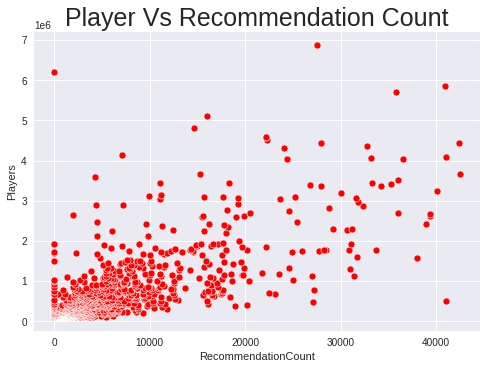

In [ ]:
#Create scatterplot to graph correlation
sns.scatterplot(x="RecommendationCount",  y="Players", color="Red", data=df_new)
ax=plt.axes()
ax.set_title("Player Vs Recommendation Count", fontsize=25)
plt.show()

**Results**: There is a correlation between the amount of players vs the amount of recommendations the game has. The higher the amount of players, the greater number of recommendations. 
Pearson r shows a positive correlation of .73, which is greater than 0. The p-value is also significantly small. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis




---








**Hypothesis 3:** <br>
H₀ - There is no correlation between metacritic ratings and no. players<br>
Hₐ  - There is a correlation between metacritic ratings and no. players

> Tests Used - Pearsonr, Correlation Plot

In [ ]:
#Remove zero values from metacritic ratings 
#Check that those rows are removed
df_new = df_new[df.Metacritic != 0]
df_new["Metacritic"].min()

33

In [ ]:
#Look for correlation between players and Metacritic rating
stats.pearsonr(df_new['Players'],df_new['Metacritic'])

(0.23928586951243125, 1.5002362377158428e-13)

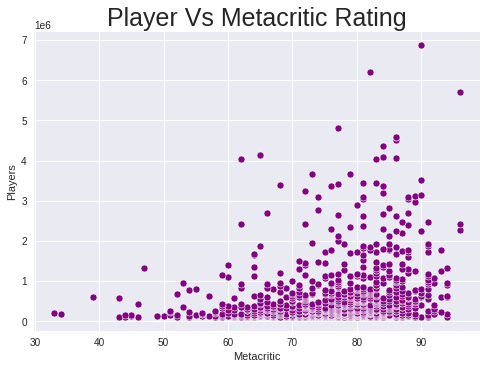

In [ ]:
#Create scatterplot to graph correlation
sns.scatterplot(x="Metacritic", y="Players", color="Purple",data=df_new)
ax=plt.axes()
ax.set_title("Player Vs Metacritic Rating", fontsize=25)
plt.show()



**Results:** Although the correlation is smaller than that of the recommendation count, there is still a positive correlation between the two. We reject the null that there is no correlation between metacritic ratings and amount of players. 

**Conclusion:**  According to the data, prices do affect the player base, and both metacritic ratings and recommendation counts have a positve correlation to number of players. I removed the outliers as it would have skewed the results. For example, the range of players go from 0-90Million. Only one game reached anything as high as 90Million. As I predicted, this game was free.  From this test, future developers and those interested in the gaming industry can see that a free game is the way to go, as users tend to spend a lot of money after they invest in the game. 